## Feature Engineering with Titanic

#### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('titanic_train.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Types of Missing values
##### Missing Completely At Random(MCAR) - There is no relationship between data missing & other values in dataset
##### Missing data Not At Random (MDNAR) - There is a relationship between missing data & other values in dataset
##### Missing At Random (MAR) - Men- hiding salary, Woman- hiding age, teenager going to Dr. with parents & saying I don't smoke

In [5]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df['Cabin_null'] = np.where(df['Cabin'].isna(),1,0)

df['Cabin_null'].mean()

0.7710437710437711

In [7]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### Mean/ median/Mode replacement
It works on assumption that data is completely missing at random (MCAR)

In [8]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)

In [11]:
median=df['Age'].median()
median

28.0

In [12]:
impute_nan(df,'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
print(df['Age'].std())
print(df.Age_median.std())

14.526497332334044
13.019696550973194


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

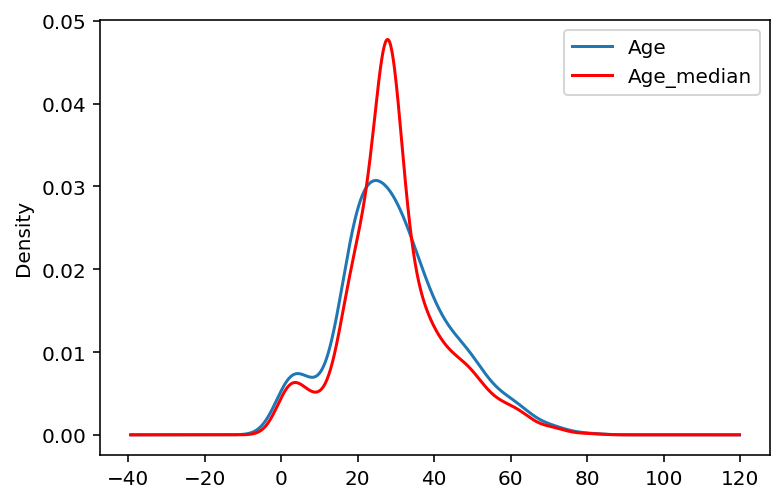

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

#### 2. Random Sampple Imputation

In [16]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.Age.dropna().sample(1)

673    31.0
Name: Age, dtype: float64

In [18]:
def impute_nan_random_sample( df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(), random_state= 10)
    random_sample.index = df[df[variable].isna()].index
    df.loc[df[variable].isna(), variable+'_random'] = random_sample

In [19]:
median= df.Age.median()
median

28.0

In [20]:
impute_nan_random_sample(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


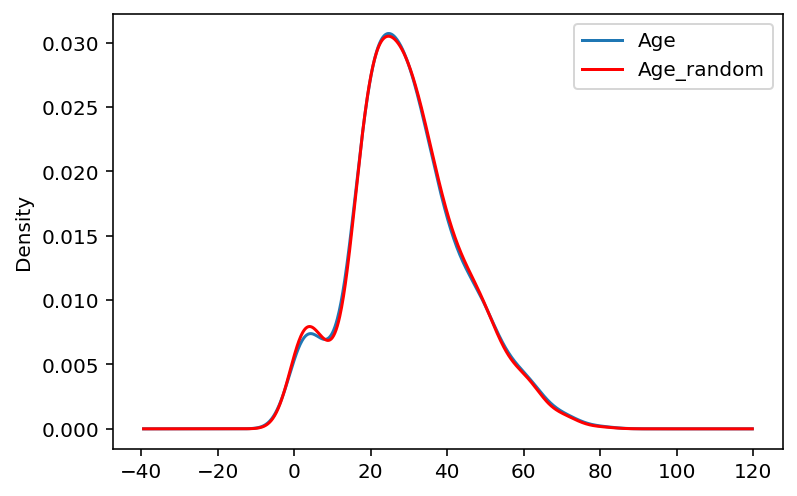

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot( kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
plt.legend(lines, labels)
plt.show()

### 3. Capturing NaN values with new feature

In [22]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df['Age_NAN'] = np.where(df['Age'].isna(),1,0)
df['Age'].fillna(df.Age.median())
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


### 4. End Of Distribution Impumtation

In [24]:
df = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

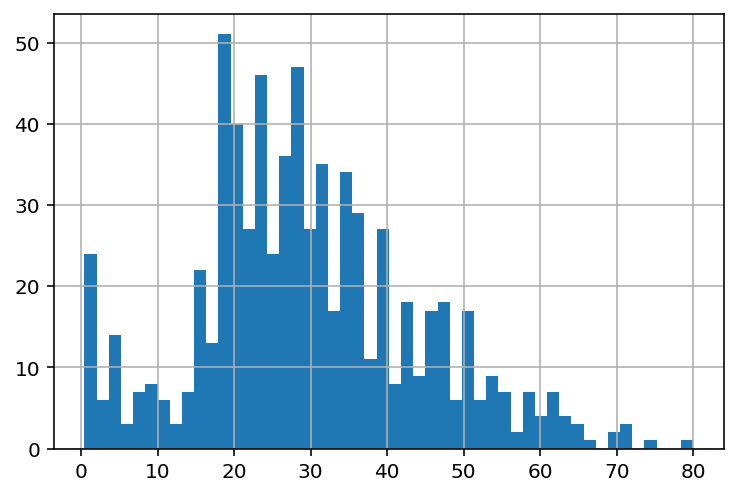

In [27]:
df.Age.hist(bins=50)

In [28]:
extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [29]:
median = df.Age.median()
median

28.0

<AxesSubplot:xlabel='Age'>

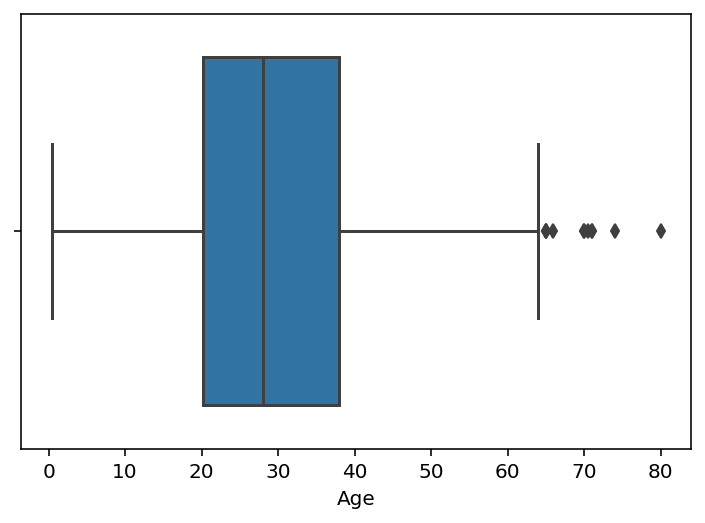

In [30]:
import seaborn as sns
sns.boxplot(df.Age)

In [31]:
def  impute_nan(df, variable, median,extreme):
    df[variable+'_endOfDistr']= df[variable].fillna(extreme)
    df[variable] = df[variable].fillna(median)

In [32]:
impute_nan(df, 'Age', median, extreme)

In [33]:
df.head()

,Survived,Age,Fare,Age_endOfDistr
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

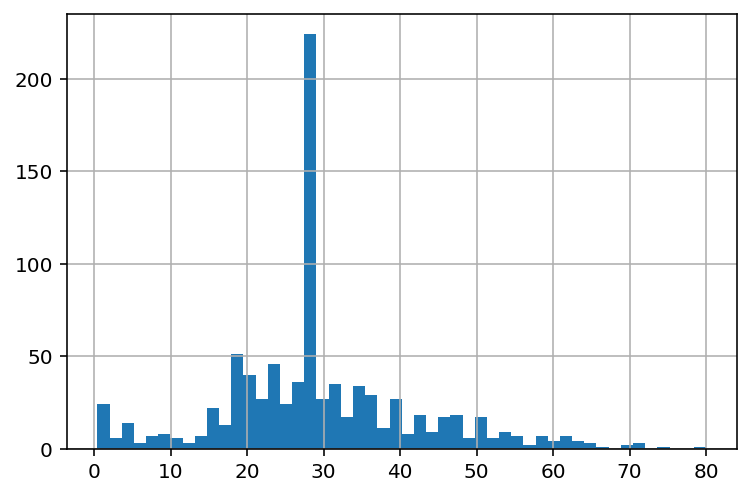

In [34]:
df.Age.hist(bins=50)

<AxesSubplot:>

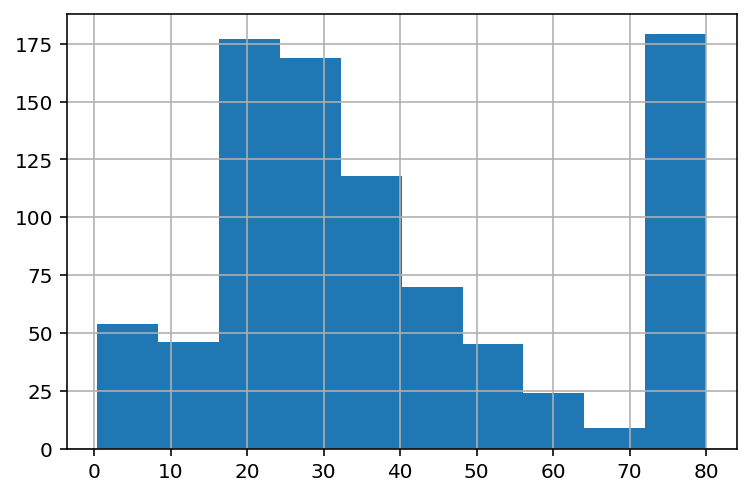

In [35]:
df['Age_endOfDistr'].hist()

<AxesSubplot:xlabel='Age_endOfDistr'>

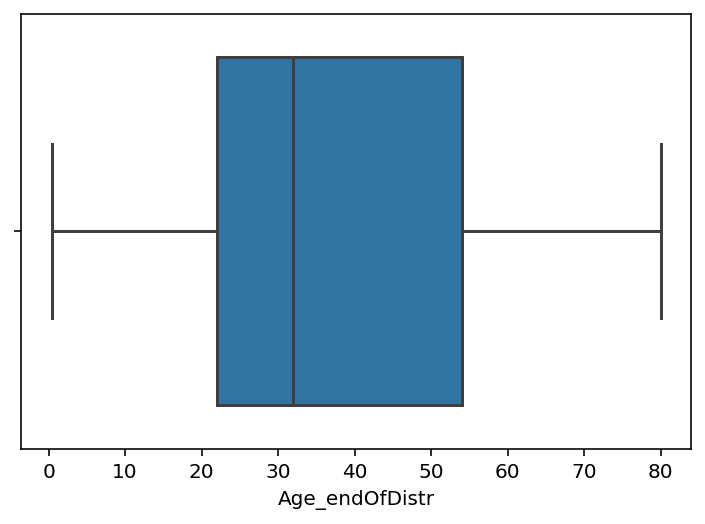

In [36]:
sns.boxplot(df['Age_endOfDistr'])